In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.11.0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = "/content/drive/MyDrive/Computer Vision Masterclass/Datasets/homer_bart_2.zip"
zip_object = zipfile.ZipFile(file = path,mode= 'r')
zip_object.extractall('./')
zip_object.close()

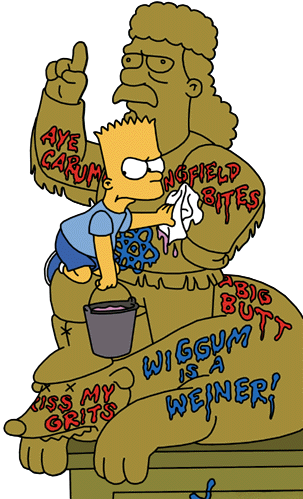

In [7]:
#visualising image using tensorflow
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart101.bmp')

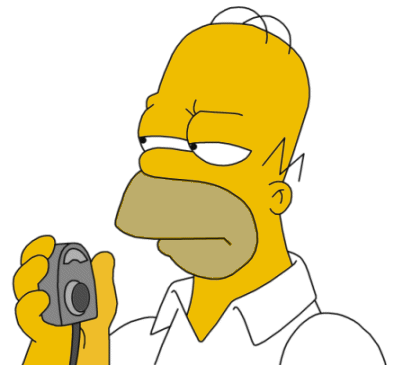

In [8]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/homer/homer104.bmp')

In [9]:
training_geenrator = ImageDataGenerator(rescale= 1./255,rotation_range = 7, horizontal_flip= True, zoom_range = 0.2)

In [19]:
#Batch size 8 means, 8 images are sent to the neural network at once and the weight adjustment is done for that and then next set of 8 images are sent
train_dataset = training_geenrator.flow_from_directory('/content/homer_bart_2/training_set', target_size = (64,64), batch_size = 8, class_mode = 'categorical',shuffle = True)

Found 215 images belonging to 2 classes.


In [12]:
type(train_dataset)

keras.preprocessing.image.DirectoryIterator

In [20]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [21]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [22]:
test_geenrator = ImageDataGenerator(rescale= 1./255)

In [23]:
test_dataset = training_geenrator.flow_from_directory('/content/homer_bart_2/test_set', target_size = (64,64), batch_size = 1, class_mode = 'categorical',shuffle = False)

Found 54 images belonging to 2 classes.


In [24]:
test_dataset.class_indices

{'bart': 0, 'homer': 1}

In [27]:
#filter --> number of filter detectors we are using
#kernal_size --> shape of the feature detector
#activation function is applied afer generating the feature map
#the training_size of test and train dataset must match the input shape of the conv layer
#flatten layer converts the matrix to vector
#units = 2 in last layer because we choose categorical, if we had choosen binary then there would be only one unit, and the softmax returns the prob of each class in the category
network = Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3), activation= 'relu', input_shape = (64,64,3)))
network.add(MaxPool2D(pool_size = (2,2)))
network.add(Conv2D(filters=32, kernel_size=(3,3), activation= 'relu'))
network.add(MaxPool2D(pool_size = (2,2)))
network.add(Conv2D(filters=32, kernel_size=(3,3), activation= 'relu'))
network.add(MaxPool2D(pool_size = (2,2)))
network.add(Flatten())
network.add(Dense(units = 1, activation = 'relu'))
network.add(Dense(units = 1, activation = 'relu'))
network.add(Dense(units = 2, activation = 'softmax'))
network.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)        

In [28]:
#number of nerurons in after flatten is 1152 which is the input size of the neural network and hence the hiddne layer can be calculated 
(1152 +2 )/2

577.0

In [29]:
network = Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3), activation= 'relu', input_shape = (64,64,3)))
network.add(MaxPool2D(pool_size = (2,2)))
network.add(Conv2D(filters=32, kernel_size=(3,3), activation= 'relu'))
network.add(MaxPool2D(pool_size = (2,2)))
network.add(Conv2D(filters=32, kernel_size=(3,3), activation= 'relu'))
network.add(MaxPool2D(pool_size = (2,2)))
network.add(Flatten())
network.add(Dense(units = 577, activation = 'relu'))
network.add(Dense(units = 577, activation = 'relu'))
network.add(Dense(units = 2, activation = 'softmax'))
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)        

In [30]:
network.compile(optimizer = 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
history = network.fit_generator(train_dataset,epochs = 30)

Epoch 1/30


<ipython-input-32-d506e95091f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset,epochs = 30)


27/27 [==============================] - 11s 22ms/step - loss: 0.7060 - accuracy: 0.6233
Epoch 2/30
27/27 [==============================] - 0s 17ms/step - loss: 0.6485 - accuracy: 0.6186
Epoch 3/30
27/27 [==============================] - 0s 18ms/step - loss: 0.5871 - accuracy: 0.6977
Epoch 4/30
27/27 [==============================] - 1s 18ms/step - loss: 0.5708 - accuracy: 0.6930
Epoch 5/30
27/27 [==============================] - 0s 18ms/step - loss: 0.5207 - accuracy: 0.7116
Epoch 6/30
27/27 [==============================] - 0s 17ms/step - loss: 0.4408 - accuracy: 0.7860
Epoch 7/30
27/27 [==============================] - 1s 18ms/step - loss: 0.3835 - accuracy: 0.8372
Epoch 8/30
27/27 [==============================] - 0s 17ms/step - loss: 0.3965 - accuracy: 0.8326
Epoch 9/30
27/27 [==============================] - 0s 17ms/step - loss: 0.3334 - accuracy: 0.8186
Epoch 10/30
27/27 [==============================] - 0s 17ms/step - loss: 0.3094 - accuracy: 0.8791
Epoch 11/30
27/27 [

The above accuracy is on the train dataset itself, so we cant rely on it, we need to find the accucary of the model using test dataset

In [34]:
test_dataset.class_indices


{'bart': 0, 'homer': 1}

In [35]:
predictions = network.predict(test_dataset)
predictions

54/54 [==============================] - 0s 4ms/step


array([[1.00000000e+00, 1.69908869e-08],
       [9.99999642e-01, 3.07745921e-07],
       [3.14615548e-01, 6.85384452e-01],
       [1.00000000e+00, 1.76516157e-09],
       [1.00000000e+00, 1.58043778e-09],
       [1.00000000e+00, 5.29292972e-12],
       [9.99996185e-01, 3.80979986e-06],
       [9.88301337e-01, 1.16986595e-02],
       [7.91694045e-01, 2.08305985e-01],
       [5.99991083e-01, 4.00008917e-01],
       [9.10126448e-01, 8.98735747e-02],
       [1.00000000e+00, 3.62637631e-09],
       [9.93491709e-01, 6.50832336e-03],
       [9.89219964e-01, 1.07800206e-02],
       [9.52430844e-01, 4.75691147e-02],
       [1.00000000e+00, 2.65638489e-09],
       [9.24024761e-01, 7.59752318e-02],
       [9.53627050e-01, 4.63729687e-02],
       [1.53286383e-01, 8.46713543e-01],
       [1.00000000e+00, 1.55673814e-15],
       [5.46213575e-02, 9.45378602e-01],
       [1.00000000e+00, 1.94247534e-08],
       [9.99992132e-01, 7.81790004e-06],
       [8.22236836e-02, 9.17776346e-01],
       [9.999895

In [36]:
predictions = np.argmax(predictions,axis =1)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.8703703703703703

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
cm

array([[24,  4],
       [ 3, 23]])

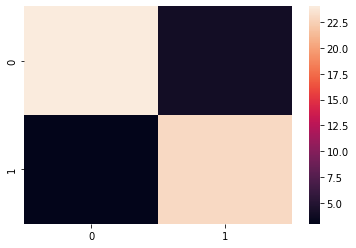

In [43]:
sns.heatmap(cm)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.85      0.88      0.87        26

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



In [45]:
image = cv2.imread("/content/homer_bart_2/test_set/homer/homer15.bmp")

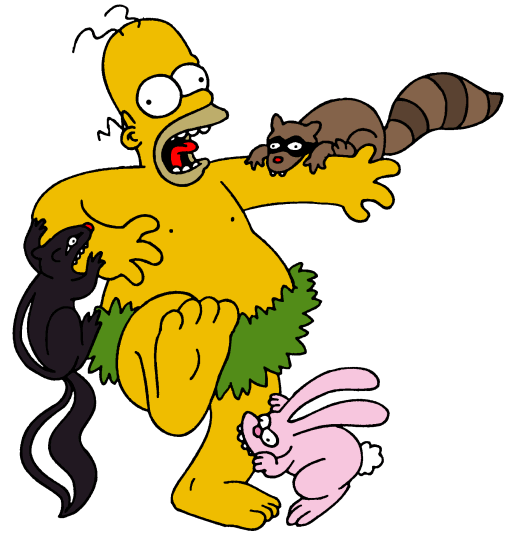

In [46]:
cv2_imshow(image)

In [47]:
image.shape

(536, 514, 3)

In [48]:
image = cv2.resize(image,(64,64))

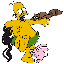

In [49]:
cv2_imshow(image)

In [50]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [51]:
image = image / 255
image

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [52]:
image.shape

(64, 64, 3)

In [53]:
#reshape the image to indicate the number of images to be sent to neural network in 1 batch
image = image.reshape(-1,64,64,3)
image.shape

(1, 64, 64, 3)

if we are sending 10 image in a batch then the shape would be (10,64,64,3)

In [54]:
result = network.predict(image)

1/1 [==============================] - 0s 267ms/step


In [55]:
result

array([[0.04032758, 0.95967245]], dtype=float32)

In [56]:
result = np.argmax(result)
result

1

In [57]:
if result == 0:
  print('Bart')
else:
  print('Homer')

Homer
